In [3]:
from transformers import T5Tokenizer
from datasets import DatasetDict

import numpy as np
import pandas as pd

from matplotlib.pyplot import hist
import matplotlib.pyplot as plt
import matplotlib as mpl

# Predict Results

In [16]:
test_data = DatasetDict.load_from_disk("dataset_test")
new_tokenizer_t5 = T5Tokenizer.from_pretrained("mt3_tokenizer")

In [22]:
dev = {'en': [],
       'et': [],
       'mk':[]
      }

for x in test_data['dev']:
    for k,v in x['translation'].items():
        dev[k].append(len(new_tokenizer_t5(v).input_ids))

In [19]:
devtest = {'en': [],
           'et': [],
           'mk':[]
          }

for x in test_data['devtest']:
    for k,v in x['translation'].items():
        devtest[k].append(len(new_tokenizer_t5(v).input_ids))

In [73]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

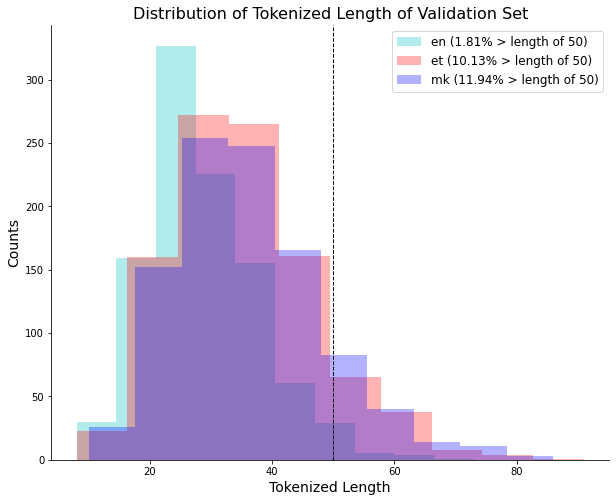

In [100]:
d = dev
alpha =.3
d_string = "Validation"
over = {k:np.round((np.array(v)>50).mean()*100,2) for k,v in d.items()}
plt.figure(figsize=(10,8))
hist(d['en'], alpha=alpha, color='c', label='en ({}% > length of 50)'.format(over['en']))
hist(d['et'], alpha=alpha, color='r', label='et ({}% > length of 50)'.format(over['et']))
hist(d['mk'], alpha=alpha, color='b', label='mk ({}% > length of 50)'.format(over['mk']))
plt.axvline(50, color='k', linestyle='dashed', linewidth=1)

plt.title(f"Distribution of Tokenized Length of {d_string} Set",fontsize=16)
plt.xlabel("Tokenized Length", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend(prop={'size': 12})
plt.show()

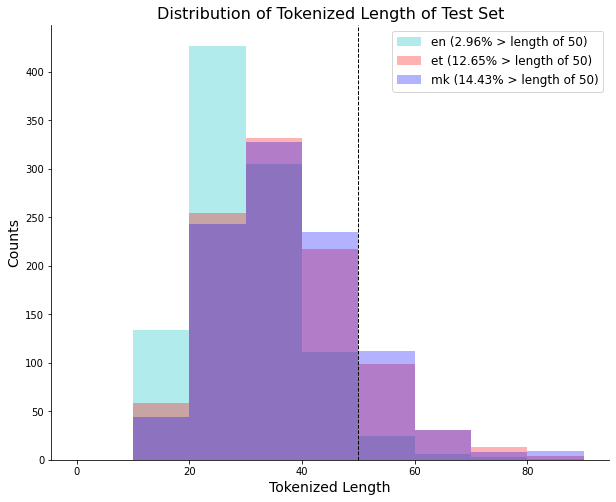

In [104]:
d = devtest
alpha =.3
d_string = "Test"

over = {k:np.round((np.array(v)>50).mean()*100,2) for k,v in d.items()}
plt.figure(figsize=(10,8))
hist(d['en'], alpha=alpha, color='c', label='en ({}% > length of 50)'.format(over['en']), bins=range(0,100,10))
hist(d['et'], alpha=alpha, color='r', label='et ({}% > length of 50)'.format(over['et']), bins=range(0,100,10))
hist(d['mk'], alpha=alpha, color='b', label='mk ({}% > length of 50)'.format(over['mk']), bins=range(0,100,10))
plt.axvline(50, color='k', linestyle='dashed', linewidth=1)

plt.title(f"Distribution of Tokenized Length of {d_string} Set",fontsize=16)
plt.xlabel("Tokenized Length", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend(prop={'size': 12})
plt.show()